In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings 
import seaborn as sns

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
np.set_printoptions(precision=2)

# Regression
Predict the cured, deaths and confirmed cases.

Based on that we can predict the overall condition to the state.
Improved or degraded.

In [51]:
# Covid 19 India data
df = pd.read_csv("../Data/covid_19_india.csv")
df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [52]:
# Statewise Testing Details data
df1 = pd.read_csv("../Data/StatewiseTestingDetails.csv")
df1.head

<bound method NDFrame.head of              Date                        State  TotalSamples Negative  \
0      2020-04-17  Andaman and Nicobar Islands        1403.0     1210   
1      2020-04-24  Andaman and Nicobar Islands        2679.0      NaN   
2      2020-04-27  Andaman and Nicobar Islands        2848.0      NaN   
3      2020-05-01  Andaman and Nicobar Islands        3754.0      NaN   
4      2020-05-16  Andaman and Nicobar Islands        6677.0      NaN   
...           ...                          ...           ...      ...   
16331  2021-08-06                  West Bengal    15999961.0      NaN   
16332  2021-08-07                  West Bengal    16045662.0      NaN   
16333  2021-08-08                  West Bengal    16092192.0      NaN   
16334  2021-08-09                  West Bengal    16122345.0      NaN   
16335  2021-08-10                  West Bengal    16162814.0      NaN   

       Positive  
0          12.0  
1          27.0  
2          33.0  
3          33.0  
4  

In [53]:
# Covid vaccine statewise data
df2 = pd.read_csv("../Data/covid_vaccine_statewise.csv")
df2.head()

,Updated On,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),Covaxin (Doses Administered),CoviShield (Doses Administered),Sputnik V (Doses Administered),AEFI,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16-01-2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,579.0,47697.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,17-01-2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,635.0,57969.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
2,18-01-2021,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,1299.0,98150.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0
3,19-01-2021,India,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,NaN,3017.0,192508.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81901.0,113613.0,11.0,195525.0
4,20-01-2021,India,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,NaN,3946.0,247334.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98111.0,153145.0,24.0,251280.0


# Data Preparation and Cleaning

In [54]:
df.shape

(18110, 9)

In [55]:
# Function to replace names
def replace_names(old, new):
    df["State/UnionTerritory"].replace(old, new, inplace=True)

In [56]:
states = df["State/UnionTerritory"].unique().tolist()
print(states)
print("Total unique states and union territories =", len(states))

['Kerala', 'Telengana', 'Delhi', 'Rajasthan', 'Uttar Pradesh', 'Haryana', 'Ladakh', 'Tamil Nadu', 'Karnataka', 'Maharashtra', 'Punjab', 'Jammu and Kashmir', 'Andhra Pradesh', 'Uttarakhand', 'Odisha', 'Puducherry', 'West Bengal', 'Chhattisgarh', 'Chandigarh', 'Gujarat', 'Himachal Pradesh', 'Madhya Pradesh', 'Bihar', 'Manipur', 'Mizoram', 'Andaman and Nicobar Islands', 'Goa', 'Unassigned', 'Assam', 'Jharkhand', 'Arunachal Pradesh', 'Tripura', 'Nagaland', 'Meghalaya', 'Dadra and Nagar Haveli and Daman and Diu', 'Cases being reassigned to states', 'Sikkim', 'Daman & Diu', 'Lakshadweep', 'Telangana', 'Dadra and Nagar Haveli', 'Bihar****', 'Madhya Pradesh***', 'Himanchal Pradesh', 'Karanataka', 'Maharashtra***']
Total unique states and union territories = 46


In [57]:
# Cleaning data 
# Replacing incorrect names of States

replace_names("Maharashtra***", "Maharashtra")
replace_names("Madhya Pradesh***", "Madhya Pradesh")
replace_names("Bihar****", "Bihar")
replace_names("Dadra and Nagar Haveli", "Dadra and Nagar Haveli and Daman and Diu")
replace_names("Daman & Diu", "Dadra and Nagar Haveli and Daman and Diu")
replace_names("Himanchal Pradesh", "Himachal Pradesh")
replace_names("Telengana", "Telangana")
replace_names("Karanataka", "Karnataka")


states = df["State/UnionTerritory"].unique().tolist()
print(states)
print("Total unique states and union territories =", len(states))

['Kerala', 'Telangana', 'Delhi', 'Rajasthan', 'Uttar Pradesh', 'Haryana', 'Ladakh', 'Tamil Nadu', 'Karnataka', 'Maharashtra', 'Punjab', 'Jammu and Kashmir', 'Andhra Pradesh', 'Uttarakhand', 'Odisha', 'Puducherry', 'West Bengal', 'Chhattisgarh', 'Chandigarh', 'Gujarat', 'Himachal Pradesh', 'Madhya Pradesh', 'Bihar', 'Manipur', 'Mizoram', 'Andaman and Nicobar Islands', 'Goa', 'Unassigned', 'Assam', 'Jharkhand', 'Arunachal Pradesh', 'Tripura', 'Nagaland', 'Meghalaya', 'Dadra and Nagar Haveli and Daman and Diu', 'Cases being reassigned to states', 'Sikkim', 'Lakshadweep']
Total unique states and union territories = 38


In [58]:
# Checking for 'Unassigned' and 'Cases being reassigned to states rows' in the data
print('Cases being reassigned to states =', len(df[df['State/UnionTerritory'] == 'Cases being reassigned to states']))
print('Unassigned =', len(df[df['State/UnionTerritory'] == 'Unassigned']))

Cases being reassigned to states = 60
Unassigned = 3


In [59]:
# Dropping 'Unassigned' and 'Cases being reassigned to states' rows from the data
indexes1 = df[df['State/UnionTerritory'] == 'Cases being reassigned to states'].index
indexes2 = df[df['State/UnionTerritory'] == 'Unassigned'].index
df.drop(indexes1, inplace=True)
df.drop(indexes2, inplace=True)

In [60]:
states = df["State/UnionTerritory"].unique().tolist()
print(states)
print("Total unique states and union territories =", len(states))

['Kerala', 'Telangana', 'Delhi', 'Rajasthan', 'Uttar Pradesh', 'Haryana', 'Ladakh', 'Tamil Nadu', 'Karnataka', 'Maharashtra', 'Punjab', 'Jammu and Kashmir', 'Andhra Pradesh', 'Uttarakhand', 'Odisha', 'Puducherry', 'West Bengal', 'Chhattisgarh', 'Chandigarh', 'Gujarat', 'Himachal Pradesh', 'Madhya Pradesh', 'Bihar', 'Manipur', 'Mizoram', 'Andaman and Nicobar Islands', 'Goa', 'Assam', 'Jharkhand', 'Arunachal Pradesh', 'Tripura', 'Nagaland', 'Meghalaya', 'Dadra and Nagar Haveli and Daman and Diu', 'Sikkim', 'Lakshadweep']
Total unique states and union territories = 36


In [61]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Sno,18047.0,NaN,NaN,NaN,9076.41813,5224.916438,1.0,4575.5,9087.0,13598.5,18110.0
Date,18047,560,2021-08-11,36,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Time,18047,7,8:00 AM,16412,NaN,NaN,NaN,NaN,NaN,NaN,NaN
State/UnionTerritory,18047,36,Kerala,560,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ConfirmedIndianNational,18047,62,-,17601,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ConfirmedForeignNational,18047,12,-,17601,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cured,18047.0,NaN,NaN,NaN,279610.209564,615742.451962,0.0,3392.0,33924.0,280679.0,6159676.0
Deaths,18047.0,NaN,NaN,NaN,4066.548734,10935.489348,0.0,34.0,598.0,3669.5,134201.0
Confirmed,18047.0,NaN,NaN,NaN,302063.110822,657060.375285,0.0,4387.0,40269.0,301280.5,6363442.0


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18047 entries, 0 to 18109
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sno                       18047 non-null  int64 
 1   Date                      18047 non-null  object
 2   Time                      18047 non-null  object
 3   State/UnionTerritory      18047 non-null  object
 4   ConfirmedIndianNational   18047 non-null  object
 5   ConfirmedForeignNational  18047 non-null  object
 6   Cured                     18047 non-null  int64 
 7   Deaths                    18047 non-null  int64 
 8   Confirmed                 18047 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 1.4+ MB


In [63]:
df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [64]:
# taking the dates from the dataframe 
dates = df.iloc[:, 1].values
for i in range(5):
    print(dates[i])

2020-01-30
2020-01-31
2020-02-01
2020-02-02
2020-02-03


In [65]:
df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [66]:
df.shape

(18047, 9)

In [67]:
df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


# Data Visualisation

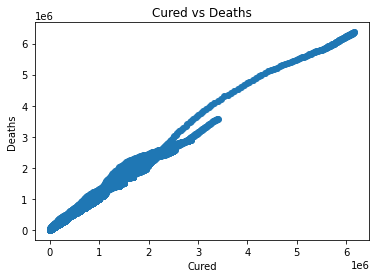

<Figure size 1440x2880 with 0 Axes>

In [68]:
plt.scatter(df.Cured, df.Confirmed)
plt.title('Cured' +' vs Deaths')
plt.ylabel('Deaths')
plt.xlabel('Cured')
plt.figure(figsize=(20,40))
plt.show()

In [69]:
df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [70]:
columns = ['Date', 'Time', 'Cured', 'Deaths', 'Confirmed']

corr = df[columns].corr()
corr.style.background_gradient(cmap='coolwarm')

,Cured,Deaths,Confirmed
Cured,1.000000,0.917492,0.997749
Deaths,0.917492,1.000000,0.918308
Confirmed,0.997749,0.918308,1.000000


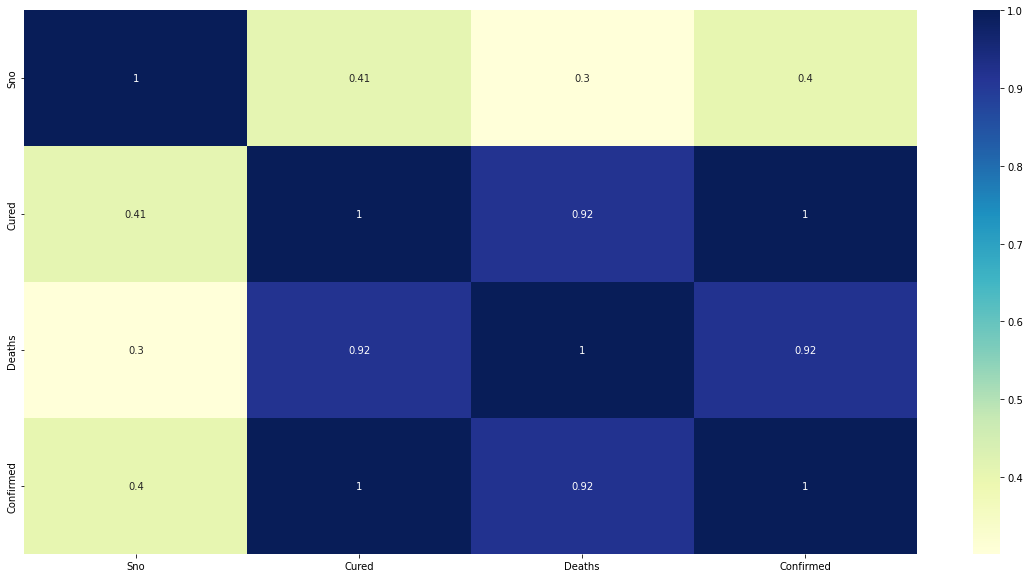

In [71]:
plt.figure(figsize = (20, 10))
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu")
plt.show()

# Splitting and Scaling Data

In [72]:
from sklearn.model_selection import train_test_split

In [73]:
df.drop('Time', axis = 1, inplace = True)
df.drop('ConfirmedIndianNational', axis = 1, inplace = True)
df.drop('ConfirmedForeignNational', axis = 1, inplace = True)
df.drop('Sno', axis = 1, inplace = True)

In [74]:
df.head()

,Date,State/UnionTerritory,Cured,Deaths,Confirmed
0,2020-01-30,Kerala,0,0,1
1,2020-01-31,Kerala,0,0,1
2,2020-02-01,Kerala,0,0,2
3,2020-02-02,Kerala,0,0,3
4,2020-02-03,Kerala,0,0,3


In [75]:
x = df.iloc[:, :-1].values # Rest of the features
y = df.iloc[:, -1].values # Confirmed
x, y

(array([['2020-01-30', 'Kerala', 0, 0],
        ['2020-01-31', 'Kerala', 0, 0],
        ['2020-02-01', 'Kerala', 0, 0],
        ...,
        ['2021-08-11', 'Uttarakhand', 334650, 7368],
        ['2021-08-11', 'Uttar Pradesh', 1685492, 22775],
        ['2021-08-11', 'West Bengal', 1506532, 18252]], dtype=object),
 array([      1,       1,       2, ...,  342462, 1708812, 1534999]))

In [76]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[("encoder", OneHotEncoder(sparse=False), [0,1])], remainder="passthrough")
x = np.array(ct.fit_transform(x))

In [77]:
print(x)

[[1.0 0.0 0.0 ... 0.0 0 0]
 [0.0 1.0 0.0 ... 0.0 0 0]
 [0.0 0.0 1.0 ... 0.0 0 0]
 ...
 [0.0 0.0 0.0 ... 0.0 334650 7368]
 [0.0 0.0 0.0 ... 0.0 1685492 22775]
 [0.0 0.0 0.0 ... 1.0 1506532 18252]]


In [78]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)

In [79]:
len(x_train),len(x_test),x_train.shape, x_test.shape

(12632, 5415, (12632, 598), (5415, 598))

In [80]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train[:,-2:] = sc.fit_transform(x_train[:,-2:])
x_test[:,-2:] = sc.transform(x_test[:,-2:])

In [81]:
print(x_train)

[[0.0 0.0 0.0 ... 0.0 -0.4440333505824146 -0.3612913389791932]
 [0.0 0.0 0.0 ... 0.0 -0.4536135195094685 -0.37281604787606293]
 [0.0 0.0 0.0 ... 0.0 -0.4555621389034747 -0.3729075138196889]
 ...
 [0.0 0.0 0.0 ... 0.0 -0.3892911574225365 -0.3424493545922474]
 [0.0 0.0 0.0 ... 0.0 -0.44592983300266814 -0.36055961143018556]
 [0.0 0.0 0.0 ... 0.0 -0.4556468614858228 -0.37281604787606293]]


In [82]:
y_train = sc.fit_transform(y_train.reshape(-1,1))

# Model building

# Linear Regression

In [83]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [84]:
y_pred = lr.predict(x_test)
y_pred

array([[-0.46],
       [-0.36],
       [ 1.09],
       ...,
       [ 0.83],
       [-0.22],
       [-0.35]])

In [85]:
print(np.concatenate((sc.inverse_transform(y_pred.reshape(len(y_pred),1)), 
                      y_test.reshape(len(y_test),1)), 
                     axis=1))

[[   3721.22   13371.  ]
 [  66606.97   53222.  ]
 [1015324.02 1002600.  ]
 ...
 [ 846011.04  823607.  ]
 [ 158582.92  154936.  ]
 [  72429.27  105424.  ]]


In [86]:
from sklearn.metrics import r2_score
a = r2_score(y_test, sc.inverse_transform(y_pred))
print(a)

-3.388129592549739e+19


In [87]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
a = mean_squared_error(y_test, sc.inverse_transform(y_pred))
b = mean_absolute_error(y_test, sc.inverse_transform(y_pred))
a, b

(1.4759854137475432e+31, 57340889387881.02)

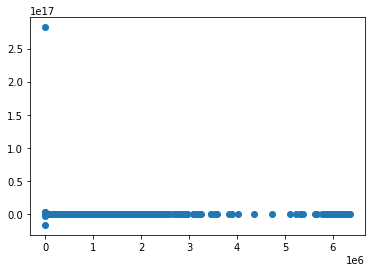

In [88]:
plt.scatter(y_test, sc.inverse_transform(y_pred))
plt.show()

# Using Decision Tree Regressor

In [89]:
from sklearn.tree import DecisionTreeRegressor

In [90]:
dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)

DecisionTreeRegressor()

In [91]:
y_pred_dt = dt.predict(x_test)
y_pred_dt

array([-0.44, -0.38,  1.07, ...,  0.8 , -0.23, -0.29])

In [92]:
print(np.concatenate((sc.inverse_transform(y_pred_dt.reshape(len(y_pred_dt),1)), 
                        y_test.reshape(len(y_test),1)),
                        axis=1))

[[  13376.   13371.]
 [  55460.   53222.]
 [1002849. 1002600.]
 ...
 [ 823687.  823607.]
 [ 152442.  154936.]
 [ 110945.  105424.]]


In [93]:
from sklearn.metrics import r2_score
a = r2_score(y_test, sc.inverse_transform(y_pred_dt))
print(a)

ValueError: Expected 2D array, got 1D array instead:
array=[-0.44 -0.38  1.07 ...  0.8  -0.23 -0.29].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
x_test.shape

(5415, 2)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
a = mean_squared_error(y_test, sc.inverse_transform(y_pred_dt))
b = mean_absolute_error(y_test, sc.inverse_transform(y_pred_dt))
a, b

(526625546632.40027, 301649.77968299424)

In [ ]:
plt.figure(figsize=(20,15),dpi=50)
plt.scatter(y_test, sc.inverse_transform(y_pred_dt), color = 'red')
plt.title('Truth or Bluff (Decision Tree Regression)')
plt.xlabel('y_test')
plt.ylabel('y_pred_dtree')
plt.show()

# Using Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf = RandomForestRegressor(random_state=1)
rf_model = rf.fit(x_train, y_train)

In [ ]:
y_pred_rf = rf_model.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score
a = r2_score(y_test, sc.inverse_transform(y_pred_rf))
print(a)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
mae_rf = mean_absolute_error(y_test, sc.inverse_transform(y_pred_rf))
mse_rf = mean_squared_error(y_test, sc.inverse_transform(y_pred_rf))
mae_rf, mse_rf

(301649.7802213979, 526625548932.50977)

In [ ]:
plt.figure(figsize=(20,15),dpi=50)
plt.scatter(y_test, sc.inverse_transform(y_pred_rf), color = 'red')
plt.title('Truth or Bluff (Decision Tree Regression)')
plt.xlabel('y_test')
plt.ylabel('y_pred_rf')
plt.show()